# Giới thiệu về thư viện TiLearn

TiLearn /taɪlɜrn/ là sự kết hợp của Time và Machine Learning, thư viện được xây dựng với mục đích ban đầu hướng đến mục tiêu tự động hoá quá trình đánh giá trọng số cho công việc ($w_j$) và cải thiện quá trình phân nhánh (Learning to Branch) bằng phương pháp học máy.

Mã nguồn hiện đã được tải lên GitHub, xem đường dẫn bên dưới.

Đường dẫn GitHub: [https://github.com/Bancie/TiLearn](https://github.com/Bancie/TiLearn)

Thư viện cũng đã được công bố trên trang PyPI và có thể dễ dàng tải và sử dụng.

Đường dẫn: [https://pypi.org/project/TiLearn/](https://pypi.org/project/TiLearn/)

Bên cạnh đó, trang web document là trang web được thiết kế nhằm tạo các tài liệu hướng dẫn cách sử dụng, cách chạy cũng như cách thư viện hoạt động.

Đường dẫn: [https://bancie.github.io/TiLearn/](https://bancie.github.io/TiLearn/)

Hiện thư viện đã hoàn thiện các tính năng sau:

- Hàm chạy thuật toán EDD.

- Hàm chạy thuật toán WSPT.

- Hàm giúp xử lý bài toán $1||\sum C_j$.

- Hàm giúp xử lý bài toán $1||\sum w_j C_j$.

- Hàm giúp xử lý bài toán $1|prec|\sum C_j$.

- Hàm giúp xử lý bài toán $1|prec|\sum w_j C_j$.

- Hàm giúp xử lý hỗn hợp 2 bài toán $1|prec|\sum w_j C_j$ và $1||\sum w_j C_j$.

Chi tiết hướng dẫn cách sử dụng, tham số, ý nghĩa từng tham số của từng hàm sẽ được cập nhật trên trang [document](https://bancie.github.io/TiLearn/).

Để sử dụng thư viện, ta tải thư viện bằng lệnh sau

In [1]:
%pip install tilearn

Note: you may need to restart the kernel to use updated packages.


Một số thư viện hỗ trợ phân tích

In [2]:
%pip install pandas
%pip install ipython
%pip install jinja2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Ta khai báo thư viện chính sau

In [3]:
import tilearn as tl
from tilearn import _plat as pl

Một số thư viện hỗ trợ phân tích dữ liệu

In [4]:
import csv
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

# Chạy số liệu minh hoạ bằng TiLearn

Giả sử ta cần xử lý 3 danh sách sau

- Danh sách 1:

In [5]:
list1 = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/data/list1.csv'
display(pd.read_csv(list1))

,Name,p,r,d,w
0,Job 1,4,0,100,0.65
1,Job 2,1,0,100,0.84
2,Job 3,3,0,100,0.46
3,Job 4,3,0,100,0.79
4,Job 5,1,0,100,0.17
5,Job 6,3,0,100,0.50
6,Job 7,4,0,100,0.95
7,Job 8,2,0,100,0.14
8,Job 9,5,0,100,0.52
9,Job 10,2,0,100,0.40


- Danh sách 2:

In [6]:
list2 = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/data/list2.csv'
display(pd.read_csv(list2))

,Name,p,r,d,w
0,Job 16,4,0,100,0.70
1,Job 17,3,0,100,0.95
2,Job 18,4,0,100,0.49
3,Job 19,1,0,100,0.13
4,Job 20,5,0,100,0.94
5,Job 21,1,0,100,0.57
6,Job 22,4,0,100,0.47


- Danh sách 3:

In [7]:
list3 = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/data/list3.csv'
display(pd.read_csv(list3))

,Name,p,r,d,w
0,Job 23,4,0,100,0.24
1,Job 24,1,0,100,0.54
2,Job 25,2,0,100,0.81
3,Job 26,2,0,100,0.41
4,Job 27,5,0,100,0.22
5,Job 28,2,0,100,0.29
6,Job 29,5,0,100,0.65
7,Job 30,4,0,100,0.69


Trong đó, danh sách 1 các công việc độc lập và không tồn tại chuỗi, tức $1||\sum w_j C_j$, danh sách 2 và 3 thuộc dạng $1|prec|\sum w_j C_j$.

Cấu trúc tập tin được thiết lập như sau:

```txt
thuhoach2/
├── main.py
└── data/
    ├── backup/
    ├── list1.csv
    ├── list2.csv
    └── list3.csv
```

Khai báo đường dẫn dữ liệu

In [8]:
original = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/data'
backup = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/data/backup'

Chọn dạng bài toán cho từng danh sách bằng cách chọn ``prec`` như sau:
    
- ``prec=0`` cho bài toán không đòi hỏi công việc tuần tự.

- ``prec=1`` cho bài toán đòi hỏi công việc có tuần tự.

In [9]:
lists = [
    pl.List(file_path=list1, prec=0),
    pl.List(file_path=list2, prec=1),
    pl.List(file_path=list3, prec=1),
]

Ta chạy chương trình bằng lệnh sau

In [10]:
schedule = tl.optimal_list(lists, original, backup)
print(schedule)

[['Job 14', 1.0, 0, 100, 0.9, 0.9], ['Job 2', 1.0, 0, 100, 0.84, 0.84], ['Job 12', 1.0, 0, 100, 0.39, 0.39], ['Job 13', 2.0, 0, 100, 0.57, 0.285], ['Job 4', 3.0, 0, 100, 0.79, 0.26333333333333336], ['Job 7', 4.0, 0, 100, 0.95, 0.2375], ['Job 16', 4.0, 0, 100, 0.7, 0.175], ['Job 17', 3.0, 0, 100, 0.95, 0.2357142857142857], ['Job 23', 4.0, 0, 100, 0.24, 0.06], ['Job 24', 1.0, 0, 100, 0.54, 0.156], ['Job 25', 2.0, 0, 100, 0.81, 0.22714285714285715], ['Job 15', 1.0, 0, 100, 0.22, 0.22], ['Job 26', 2.0, 0, 100, 0.41, 0.205], ['Job 10', 2.0, 0, 100, 0.4, 0.2], ['Job 18', 4.0, 0, 100, 0.49, 0.1225], ['Job 19', 1.0, 0, 100, 0.13, 0.124], ['Job 20', 5.0, 0, 100, 0.94, 0.156], ['Job 21', 1.0, 0, 100, 0.57, 0.19363636363636363], ['Job 5', 1.0, 0, 100, 0.17, 0.17], ['Job 6', 3.0, 0, 100, 0.5, 0.16666666666666666], ['Job 1', 4.0, 0, 100, 0.65, 0.1625], ['Job 3', 3.0, 0, 100, 0.46, 0.15333333333333335], ['Job 11', 4.0, 0, 100, 0.55, 0.1375], ['Job 22', 4.0, 0, 100, 0.47, 0.1175], ['Job 27', 5.0, 0, 

Để giúp danh sách dễ quan sát, ta có thể dùng lệnh sau

In [11]:
header = ['Name','p','r','d','w','p-factor']
output = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/ouput.csv'
schedule = tl.optimal_list(lists, original, backup)
with open(output, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(schedule)

Ta có bảng dữ liệu đầu ra đọc từ file `output.csv`

In [12]:
display(pd.read_csv('/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/ouput.csv'))

,Name,p,r,d,w,p-factor
0,Job 14,1.0,0,100,0.90,0.900000
1,Job 2,1.0,0,100,0.84,0.840000
2,Job 12,1.0,0,100,0.39,0.390000
3,Job 13,2.0,0,100,0.57,0.285000
4,Job 4,3.0,0,100,0.79,0.263333
5,Job 7,4.0,0,100,0.95,0.237500
6,Job 16,4.0,0,100,0.70,0.175000
7,Job 17,3.0,0,100,0.95,0.235714
8,Job 23,4.0,0,100,0.24,0.060000
9,Job 24,1.0,0,100,0.54,0.156000


## Trực quan hoá dữ liệu

Ta sử dụng thư viện `pandas` giúp hỗ trợ tạo biểu đồ trực quan hoá dữ liệu

In [13]:
df = pd.read_csv(r'/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/ouput.csv', engine='pyarrow')

Ta xét biểu đồ khoảng thời gian xử lý

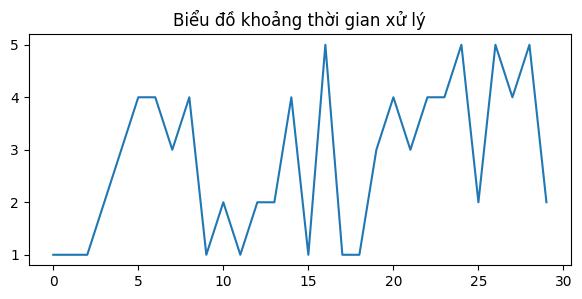

In [14]:
plt.figure(figsize=(7, 3))
df['p'].plot(title='Biểu đồ khoảng thời gian xử lý')
plt.show()

Dựa vào biểu đồ trên, có thể thấy rằng sau khi tối ưu hóa danh sách công việc, thời gian xử lý của từng công việc có xu hướng tăng từ công việc đầu tiên đến công việc cuối cùng.

Ta xét biểu đồ trọng số công việc

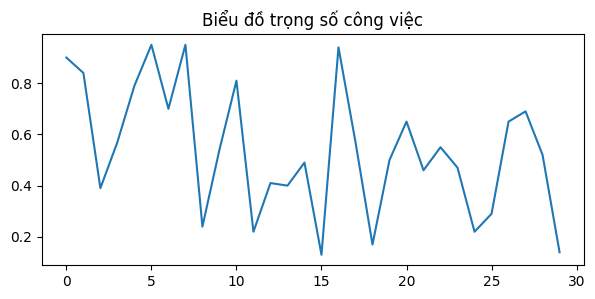

In [15]:
plt.figure(figsize=(7, 3))
df['w'].plot(title='Biểu đồ trọng số công việc')
plt.show()

Dựa vào biểu đồ trên, ta có thể thấy rằng sau khi tối ưu hóa danh sách công việc, trọng số của từng công việc có xu hướng giảm từ công việc đầu tiên đến công việc cuối cùng.

Từ đây, ta dễ dàng nhận thấy rằng các công việc có thời gian xử lý ngắn và trọng số (mức độ ưu tiên) cao sẽ được đẩy lên đầu, trong khi những công việc có thời gian xử lý dài hơn và mức độ ưu tiên thấp hơn sẽ được xếp sau.

# Lập kế hoạch gia công thiết kế bằng TiLearn

## Giới thiệu về quy trình thiết kế

Trong quá trình xử lý, studio thường phải đối mặt với việc phân bổ nguồn lực và điều chỉnh thiết kế cho nhiều dự án đồng thời, dựa trên sự ưu tiên của khách hàng, độ phức tạp của từng dự án và các yếu tố ngoại cảnh như thời gian thi công. Việc áp dụng các kỹ thuật lập lịch giúp quản lý dữ liệu và lập kế hoạch hiệu quả hơn, đồng thời theo dõi tiến độ và điều chỉnh khi cần thiết.

Thông thường, một dự án thiết kế nội thất trải qua các giai đoạn chính sau:

- Phát triển ý tưởng
- Quy hoạch không gian
- Phát triển thiết kế
- Lựa chọn vật liệu
- Tính toán chi phí
- Xây dựng
- Lắp đặt
- Decor
- Bàn giao

Mỗi công đoạn cần được thực hiện theo thứ tự, với yêu cầu hoàn thành công việc trước khi bắt đầu bước tiếp theo. Do đó, bài toán có thể được mô hình hóa dưới dạng bài toán lập lịch $1|prec|\sum w_j C_j$, trong đó các công việc phải tuân theo thứ tự ưu tiên và ràng buộc trước sau.

Ngoài ra, studio còn phải thực hiện các công việc khảo sát hiện trạng cho nhiều dự án khác nhau, mà không yêu cầu tuân thủ tuần tự giữa các công việc. Trường hợp này có thể được mô hình hóa bằng bài toán $1||\sum w_j C_j$, trong đó các công việc có thể hoàn thành theo thứ tự tự do.

## Chạy số liệu minh hoạ

Giả sử ta có danh sách 3 dự án A, B và C sau

Dự án A:

In [16]:
project_A = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/data_project/Project A-Project A.csv'
display(pd.read_csv(project_A))

,name,p,r,d,w
0,Project A - Phát triển ý tưởng,4,0,200,0.85
1,Project A - Quy hoạch không gian,3,0,200,0.80
2,Project A - Phát triển thiết kế,5,0,200,0.75
3,Project A - Lựa chọn vật liệu,2,0,200,0.70
4,Project A - Tính toán chi phí,2,0,200,0.60
5,Project A - Xây dựng,10,0,200,0.95
6,Project A - Lắp đặt,4,0,200,0.70
7,Project A - Decor,3,0,200,0.85
8,Project A - Bàn giao,1,0,200,1.00


Dự án B:

In [17]:
project_B = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/data_project/Project B-Project B.csv'
display(pd.read_csv(project_B))

,name,p,r,d,w
0,Project B - Phát triển ý tưởng,8,0,200,0.85
1,Project B - Quy hoạch không gian,7,0,200,0.80
2,Project B - Phát triển thiết kế,20,0,200,0.95
3,Project B - Lựa chọn vật liệu,3,0,200,0.70
4,Project B - Tính toán chi phí,2,0,200,0.60
5,Project B - Xây dựng,40,0,200,0.95
6,Project B - Lắp đặt,15,0,200,0.70
7,Project B - Decor,9,0,200,0.85
8,Project B - Bàn giao,1,0,200,1.00


Dự án C:

In [18]:
project_C = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/data_project/Project C-Project C.csv'
display(pd.read_csv(project_C))

,name,p,r,d,w
0,Project C - Phát triển ý tưởng,5,0,200,0.85
1,Project C - Quy hoạch không gian,2,0,200,0.80
2,Project C - Phát triển thiết kế,4,0,200,0.75
3,Project C - Lựa chọn vật liệu,6,0,200,0.70
4,Project C - Tính toán chi phí,1,0,200,0.60
5,Project C - Xây dựng,15,0,200,0.95
6,Project C - Lắp đặt,4,0,200,0.70
7,Project C - Decor,4,0,200,0.85
8,Project C - Bàn giao,1,0,200,1.00


Danh sách địa điểm cần thực hiện khảo sát hiện trạng:

In [19]:
survey = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/data_project/Survey-Khảo sát.csv'
display(pd.read_csv(survey))

,name,p,r,d,w
0,Khảo sát hiện trạng 1,2,0,200,0.33
1,Khảo sát hiện trạng 2,6,0,200,0.67
2,Khảo sát hiện trạng 3,5,0,200,0.45
3,Khảo sát hiện trạng 4,15,0,200,0.85
4,Khảo sát hiện trạng 5,4,0,200,0.10
5,Khảo sát hiện trạng 6,4,0,200,0.60
6,Khảo sát hiện trạng 7,20,0,200,0.70


Cấu trúc tập tin được thiết lập như sau:

```txt
thuhoach2/
├── main.py
└── data_project/
    ├── backup/
    ├── Project A-Project A.csv
    ├── Project B-Project B.csv
    ├── Project C-Project C.csv
    └── Survey.csv
```

Khai báo đường dẫn dữ liệu

In [20]:
original_project = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/data_project'
backup_project = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/data_project/backup'

Danh sách khảo sát hiện trạng không đòi hỏi hoàn thành tuần tự, nhà thầu có thể khảo sát bất kỳ địa điểm nào trước, do đó danh sách khảo sát có ``prec=0``.

Ở danh sách dự án A, B và C yêu cầu công việc nằm sau đòi hỏi các công việc trước đó phải được hoàn thành, do đó, danh sách dự án A, B và C lần lượt đều có ``prec=1``.

Ta thiết lập danh sách như sau

In [21]:
lists_project = [
    pl.List(file_path=survey, prec=0),
    pl.List(file_path=project_A, prec=1),
    pl.List(file_path=project_B, prec=1),
    pl.List(file_path=project_C, prec=1),
]

In [22]:
schedule = tl.optimal_list(lists_project, original_project, backup_project)
print(schedule)

[['Project A - Phát triển ý tưởng', 4.0, 0, 200, 0.85, 0.2125], ['Project A - Quy hoạch không gian', 3.0, 0, 200, 0.8, 0.2357142857142857], ['Project C - Phát triển ý tưởng', 5.0, 0, 200, 0.85, 0.16999999999999998], ['Project C - Quy hoạch không gian', 2.0, 0, 200, 0.8, 0.2357142857142857], ['Project A - Phát triển thiết kế', 5.0, 0, 200, 0.75, 0.15], ['Project A - Lựa chọn vật liệu', 2.0, 0, 200, 0.7, 0.20714285714285713], ['Project A - Tính toán chi phí', 2.0, 0, 200, 0.6, 0.22777777777777775], ['Project A - Xây dựng', 10.0, 0, 200, 0.95, 0.095], ['Project A - Lắp đặt', 4.0, 0, 200, 0.7, 0.11785714285714285], ['Project A - Decor', 3.0, 0, 200, 0.85, 0.14705882352941177], ['Project A - Bàn giao', 1.0, 0, 200, 1.0, 0.19444444444444445], ['Project C - Phát triển thiết kế', 4.0, 0, 200, 0.75, 0.1875], ['Project C - Lựa chọn vật liệu', 6.0, 0, 200, 0.7, 0.11666666666666665], ['Project C - Tính toán chi phí', 1.0, 0, 200, 0.6, 0.1857142857142857], ['Khảo sát hiện trạng 1', 2.0, 0, 200, 0.3

Để giúp danh sách dễ quan sát, ta chạy chương trình bằng lệnh sau

In [23]:
header = ['Name','p','r','d','w','p-factor']
output = '/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/ouput_project.csv'
schedule = tl.optimal_list(lists_project, original_project, backup_project)
with open(output, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(schedule)

Ta có bảng dữ liệu đầu ra đọc từ file `output_project.csv`

In [24]:
display(pd.read_csv('/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/ouput_project.csv'))

,Name,p,r,d,w,p-factor
0,Project A - Phát triển ý tưởng,4.0,0,200,0.85,0.212500
1,Project A - Quy hoạch không gian,3.0,0,200,0.80,0.235714
2,Project C - Phát triển ý tưởng,5.0,0,200,0.85,0.170000
3,Project C - Quy hoạch không gian,2.0,0,200,0.80,0.235714
4,Project A - Phát triển thiết kế,5.0,0,200,0.75,0.150000
5,Project A - Lựa chọn vật liệu,2.0,0,200,0.70,0.207143
6,Project A - Tính toán chi phí,2.0,0,200,0.60,0.227778
7,Project A - Xây dựng,10.0,0,200,0.95,0.095000
8,Project A - Lắp đặt,4.0,0,200,0.70,0.117857
9,Project A - Decor,3.0,0,200,0.85,0.147059


## Trực quan hoá dữ liệu

Ta sử dụng thư viện `pandas` giúp hỗ trợ tạo biểu đồ trực quan hoá dữ liệu cho bài toán gia công thiết kế

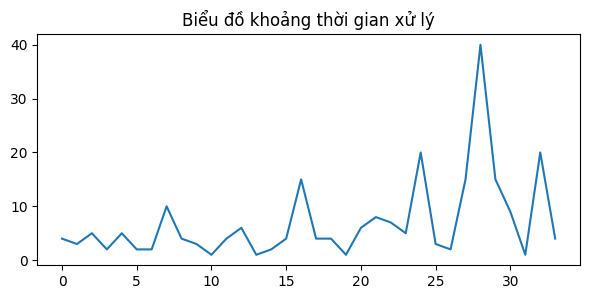

In [25]:
df_project = pd.read_csv(r'/Users/chibangnguyen/Documents/thuhoach.nckh/ipynb/thuhoach2/ouput_project.csv', engine='pyarrow')
plt.figure(figsize=(7, 3))
df_project['p'].plot(title='Biểu đồ khoảng thời gian xử lý')
plt.show()

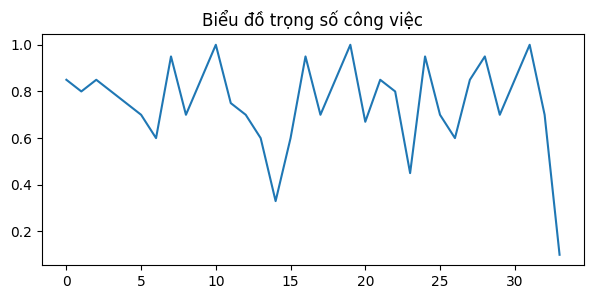

In [26]:
plt.figure(figsize=(7, 3))
df_project['w'].plot(title='Biểu đồ trọng số công việc')
plt.show()

Từ đây, ta thấy rằng các công việc có thời gian xử lý ngắn và trọng số (mức độ ưu tiên) cao sẽ được đẩy lên đầu, trong khi những công việc có thời gian xử lý dài hơn và mức độ ưu tiên thấp hơn sẽ được xếp sau, từ đó giúp tối ưu hoá quy trình dự án một cách hiệu quả.